# Python Pandas instructions

One of the most popular data science libraries is Pandas. Developed by data scientists familiar with R and Python, it has grown to support a large community of scientists and analysts. It has many built-in features, such as the ability to read data from many sources, create large dataframes (or matrixes / tables) from these sources and compute aggregate analytics based on what questions you’d like to answer. It has some built-in visualizations which can be used to chart and graph your results as well as several export functions to turn your completed analysis into an Excel Spreadsheet.

## Read data from CSV file and take a look

We create a pandas DataFrame by reading in a csv-file with the average global temperature for the years 1850 to 2016. If we look at the head of this DataFrame the notebook will render it as a nice-looking table.

In [10]:
# Importing the pandas module
import pandas as pd

# Read the data of the temperature anomaly (difference) 
# from reference period of 1961–1990 from a csv file to Pandas DataFrame
global_temp = pd.read_csv('./datasets/global_temperature.csv')

#Take a look at the first datapoints
global_temp.head()

,year,difference_temp
0,1850,-0.402
1,1851,-0.315
2,1852,-0.345
3,1853,-0.368
4,1854,-0.321


## Display plots inline 

Magic commands start with either % or %% and the command we need to nicely display plots inline is %matplotlib inline. With this magic in place, all plots created in code cells will automatically be displayed inline. 

Text(0,0.5,u'Difference Temperature')

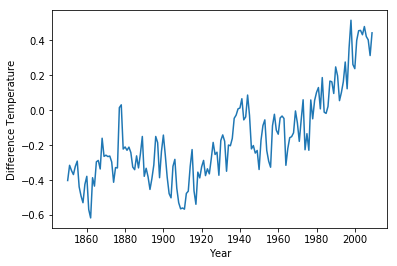

In [11]:
# Setting up inline plotting using jupyter notebook "magic"
%matplotlib inline

import matplotlib.pyplot as plt

# Plotting global temperature by year
plt.plot(global_temp['year'], global_temp['difference_temp'])

# Add some nice labels
plt.xlabel('Year')
plt.ylabel('Difference Temperature')

## Interactive map

Jupyter notebooks can render many more types of outputs such as sound, animation, video, etc. Yes, almost anything that can be shown in a modern web browser. This also makes it possible to include interactive widgets directly in the notebook!

For example, this (slightly complicated) code will create an interactive map showing the locations of the three largest smartphone companies in 2016. You can move and zoom the map, and you can click the markers for more info! 

In [4]:
# Making a map using the folium module
import folium
phone_map = folium.Map()

# Top three smart phone compagnies by market share in 2016
companies = [
    {'loc': [37.4970,  127.0266], 'label': 'Samsung: 50%'},
    {'loc': [37.3318, -122.0311], 'label': 'Apple: 40%'},
    {'loc': [22.5431, 114.0578], 'label': 'Huawei: 10%'}]

# Adding marker to the map
for company in companies:
    marker = folium.Marker(location=company['loc'], popup=company['label'])
    marker.add_to(phone_map)
    
# The last object in the cell always get shown in the notebook
phone_map